<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Mass-Casualty-Triage-Exercise" data-toc-modified-id="Mass-Casualty-Triage-Exercise-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Mass-Casualty Triage Exercise</a></span><ul class="toc-item"><li><span><a href="#Compbio-Tutorial---July-2023" data-toc-modified-id="Compbio-Tutorial---July-2023-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Compbio Tutorial - July 2023</a></span><ul class="toc-item"><li><span><a href="#Author:-Eric-Friedlander,-Adapted-by-Suzanna-Parkinson" data-toc-modified-id="Author:-Eric-Friedlander,-Adapted-by-Suzanna-Parkinson-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Author: Eric Friedlander, Adapted by Suzanna Parkinson</a></span></li></ul></li></ul></li><li><span><a href="#YOUR-NAME-HERE" data-toc-modified-id="YOUR-NAME-HERE-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>YOUR NAME HERE</a></span><ul class="toc-item"><li><span><a href="#Patient-Arrivals" data-toc-modified-id="Patient-Arrivals-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Patient Arrivals</a></span></li><li><span><a href="#Patient-Survival" data-toc-modified-id="Patient-Survival-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Patient Survival</a></span></li><li><span><a href="#Running-a-Simulation" data-toc-modified-id="Running-a-Simulation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Running a Simulation</a></span></li><li><span><a href="#Analyzing-the-Results-of-the-Simulation" data-toc-modified-id="Analyzing-the-Results-of-the-Simulation-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Analyzing the Results of the Simulation</a></span></li><li><span><a href="#Making-Conclusions" data-toc-modified-id="Making-Conclusions-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Making Conclusions</a></span></li></ul></li></ul></div>

# Mass-Casualty Triage Exercise
## Compbio Tutorial - July 2023
### Author: Eric Friedlander, Adapted by Suzanna Parkinson

# YOUR NAME HERE

We are going to be examining how different patient admission policies over the course of a 12 hour (720 minute) mass-casualty event change patient survival! By finding the best policy in different scenarios we can more effectively provide treatment and save lives. First, we need to import several packages which will be helpful.

In [1]:
# Import all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from triage_funcs import *

## Patient Arrivals

Patients arrive at the hospital at different times. It takes some time to get from the scene of the emergency to the hospital, so no one arrives right away. Because everyone’s in a hurry to see a doctor, no one takes many hours either. This curve shows the average number of patients that arrive at the hospital over time. There are two parameters: `num_pat` controls the number of patients expected on average and `peak` controls when we should expect the most arrivals. Try playing with the values inside the box of #'s and see how it changes the intensity curve (make sure to pay attention to the $y$-axis).

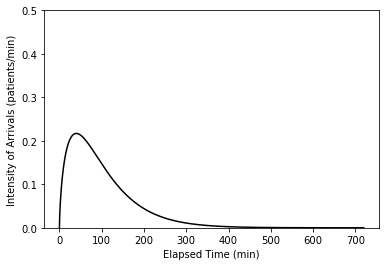

In [2]:
# Parameters for the curve
##############
num_pat = 30 #
peak = 100   #
##############

plt.rcParams['figure.figsize'] = [10, 5]
plot_arr_int(num_pat, peak)

What would happen if the IMMEDIATE (orange) and DELAYED (blue) patients arrived in different ways? The cell below will generate plots of the average arrivals for both classes of patients. You can change the way the curves look by altering the following variables inside the box of #s:
1. `numPatients` - controls the **TOTAL** number of patients
2. `ratio` - the ratio of IMMEDIATE to DELAYED patients
3. `peakI` - the time of the peak arrival intensity for IMMEDIATE class patients
4. `peakD` - the time of the peak arrival intensity for DELAYED class patients

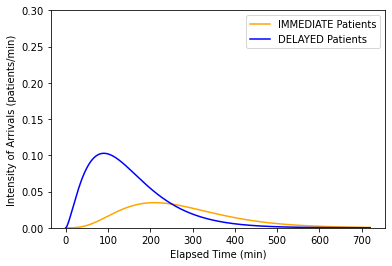

In [3]:
# Parameters for arrival processes
###############################################################################################
numPatients = 30 # Total number of patients on average                                        #
ratio = 1/3 # Ratio of IMMEDIATE patients to DELAYED patients                                 #
peakI = 270 # This parameter controls when the peak of arrivals is for IMMEDIATE patients     #
peakD = 150 # This parameter controls when the peak of arrivals is for DELAYED patients       #
###############################################################################################

plot_arr_ints(numPatients, ratio, peakI, peakD)

- Is the *mean* time of arrival higher for the immediate or delayed patients?
- Is the *variance* in the time of arrival higher for the immediate or delayed patients?

We can now use the computer to generate a sequence of arrivals. Run the cell below to see an example. Each simulated arrival is denoted by an x. Notice that you get different pictures every time you run it. Why is this? Where do the x's tend to fall?

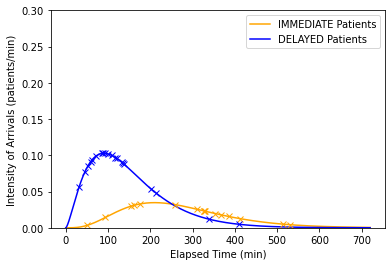

In [4]:
plot_arrivals(numPatients, ratio, peakI, peakD)

## Patient Survival
What happens when we redirect a patient to another hospital? There is some probability that the patient may die before reaching the next hospital. To mimic this, we can use the computer to generate ***random numbers*** for us. If we give the computer a probability, it can flip a coin for us and tell us whether its heads (1) or tails (0). In our simulation, we can say that patients survive when a heads comes up. Why might we want the computer to do this? Why not just come up with the numbers ourselves? 

See if you can beat the mindreader: https://web.media.mit.edu/~guysatat/MindReader/

The cell below generates a sequence of random zeros and ones. Let's say that a one means a patient survives the trip to the next hospital and zeros means that they don't make it. The parameter `prob` represents the probability of survival. What happens when you increase `prob`? What do you think appropriate values of `prob` might be for our IMMEDIATE and DELAYED class patients.

In [5]:
prob = .8 # parameter controlling the probability of survival
np.random.binomial(1, prob, size = 30)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1])

## Running a Simulation
Now we will take all of these inputs and run an actual simulation of a mass casualty event. Let's first walk through how a simulation might work with the following parameters:
1. `ratio = 1/3`
2. `peakI = 270`
3. `peakD = 150`
4. `probI = .4`
5. `probD = .8`

Run the cell below and following the direction!

In [6]:
sim_walkthrough()    

Grab a ORANGE index card from the front and write 87.4 on the front and 1 on the back.


Using the computer we can run this simulation MANY times. The parameter `num_reps` controls the number of times the simulation is run. We can also try out many different parameters.
Try out some different parameters inside the box of #s and running the simulation below. Why might we want to run many simulations?

In [7]:
###############################################################################################
# How many simulations to run                                                                 #
num_reps = 1000                                                                               #
                                                                                              #
# Parameters for arrival processes                                                            #
numPatients = 30 # Total number of patients on average                                        #
ratio = 1/3 # Ratio of IMMEDIATE patients to DELAYED patients                                 #
peakI = 270 # This parameter controls when the peak of arrivals is for IMMEDIATE patients     #
peakD = 150 # This parameter controls when the peak of arrivals is for DELAYED patients       #                      #
num_beds = 10 # Number of beds in the hospital                                                 #
                                                                                              #
# Probabilities of surviving the trip to another hospital                                     #
probI = .8                                                                                    #
probD = .4                                                                                     #
###############################################################################################

output = simulate(num_reps, num_beds, numPatients, ratio, peakI, peakD, probI, probD)

Here is the output of the simulation. We get a table where each row is a different simulation, and each column is random variable we might care about.

In [8]:
output

,FCFS_Died,IO_Died,FCFS_Survived,IO_Survived,FCFS_Beds,IO_Beds
0,6.0,13.0,29.0,22.0,0.0,0.0
1,3.0,10.0,19.0,12.0,0.0,4.0
2,17.0,17.0,25.0,25.0,0.0,0.0
3,12.0,11.0,18.0,19.0,0.0,0.0
4,10.0,14.0,21.0,17.0,0.0,0.0
...,...,...,...,...,...,...
995,11.0,12.0,18.0,17.0,0.0,1.0
996,8.0,12.0,15.0,11.0,0.0,1.0
997,11.0,15.0,18.0,14.0,0.0,3.0
998,16.0,15.0,18.0,19.0,0.0,3.0


## Analyzing the Results of the Simulation

We want to know how the distributions of the outcomes compare under the two different policies. We'll try to answer this question by analyzing the simulated data we created. To compute statistics of our data, we will use a python package called "Pandas," and often abreviated as `pd`. To create plots of our data, we will use a python package called "Matplotlib," and often abreviated as `plt`.

1. The output of the simulation tells us the number of patients who died and survived in each simulation. We might want to know the *percentage* of patients who survived instead, since different simulations had different numbers of total patients. 

Let's make a new column in our data that shows the percentage of patients who survived in each simulation under each policy.

In pandas, you can access a column of the data like this:

In [26]:
output["FCFS_Survived"]

0      29.0
1      19.0
2      25.0
3      18.0
4      21.0
       ... 
995    18.0
996    15.0
997    18.0
998    18.0
999    19.0
Name: FCFS_Survived, Length: 1000, dtype: float64

You can even do arithmetic on the columns:

In [27]:
output["FCFS_Survived"] + output["FCFS_Died"]

0      35.0
1      22.0
2      42.0
3      30.0
4      31.0
       ... 
995    29.0
996    23.0
997    29.0
998    34.0
999    25.0
Length: 1000, dtype: float64

The next cell creates a column in the data which is percentage of patients who survived under the FCFS policy. The percentage who survive is
$$\frac{\text{Survived}}{\text{Survived} + \text{Died}} \times 100$$

In [30]:
output["FCFS_Percent_Survived"] = output["FCFS_Survived"] / (output["FCFS_Survived"] + output["FCFS_Died"]) * 100

Can you create a column in the that shows the percentage of patients who survived under the IO policy?

In [32]:
# YOUR CODE HERE

Here is the updated data table:

In [35]:
output

,FCFS_Died,IO_Died,FCFS_Survived,IO_Survived,FCFS_Beds,IO_Beds,FCFS_Percent_Survived,IO_Percent_Survived
0,6.0,13.0,29.0,22.0,0.0,0.0,82.857143,62.857143
1,3.0,10.0,19.0,12.0,0.0,4.0,86.363636,54.545455
2,17.0,17.0,25.0,25.0,0.0,0.0,59.523810,59.523810
3,12.0,11.0,18.0,19.0,0.0,0.0,60.000000,63.333333
4,10.0,14.0,21.0,17.0,0.0,0.0,67.741935,54.838710
...,...,...,...,...,...,...,...,...
995,11.0,12.0,18.0,17.0,0.0,1.0,62.068966,58.620690
996,8.0,12.0,15.0,11.0,0.0,1.0,65.217391,47.826087
997,11.0,15.0,18.0,14.0,0.0,3.0,62.068966,48.275862
998,16.0,15.0,18.0,19.0,0.0,3.0,52.941176,55.882353


2. Next, we're going to create a boxplot so we can visualize the full distribution of the outcomes instead of just the means. Here's a boxplot of percentage of patients who survived under the two different policies. 

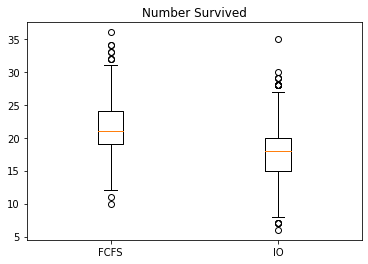

In [45]:
plt.boxplot(output[["FCFS_Survived","IO_Survived"]])
plt.title('Number Survived')
plt.xticks([1, 2], ['FCFS', 'IO'])
plt.show()

Can you copy/change the above code to create another boxplot which shows the *percentage* of patients who survived under the two policies? Remember, good plots have good titles!

In [46]:
# YOUR CODE HERE

How do the centers and spread of the two distributions above change based on the policy used?

*YOUR ANSWER HERE*

Why do the percent survived and number survived boxplots not look the same?

*YOUR ANSWER HERE*

3. Finally, let's compute the average (or "mean") of the different outcomes under different policies over all the runs of the simulation.

In [48]:
output["FCFS_Died"].mean()

8.384

Can you create a table of the mean outcomes under the different policies? Use the code syntax above to compute the means, and then put the results you get into the table. 

In [17]:
# YOUR CODE HERE

|      | Number of Deaths | Number of Survivers | Beds Remaining | Percentage Survived |
| ---- | ---------------- | ------------------- | -------------- | ------------------- |
| FCFS |  8.377           |     ?               |         ?      |     ?               |
| IO   |     ?            |     ?               |         ?      |     ?               |

On average, which policy resulted more patients surviving?

*YOUR ANSWER HERE*

## Making Conclusions

Which policy do you think is better, and why?

*YOUR ANSWER HERE*

Challenge:

Try rerunning the simulation with different parameters.  
- Is the same policy still better? 
- Can you find parameters that make FCFS better?
- Can you find parameters that make IO better?